In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/alpya/Documents/Credit-card-fraud-detection/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

In [ ]:
# Check for missing values
print(df.isnull().sum())

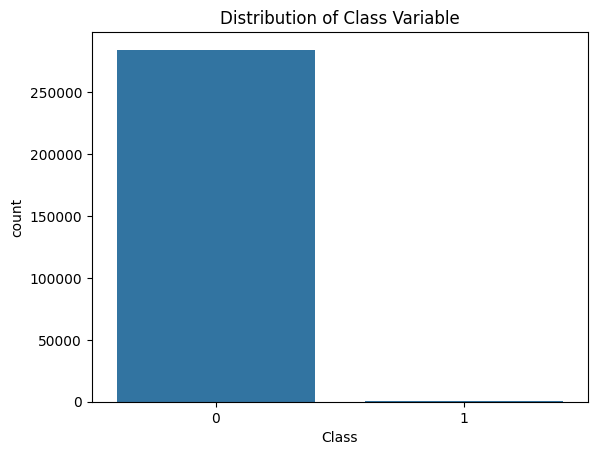

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class Variable')
plt.show()

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\alpya\AppData\Local\Temp\ipykernel_3216\2326035720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


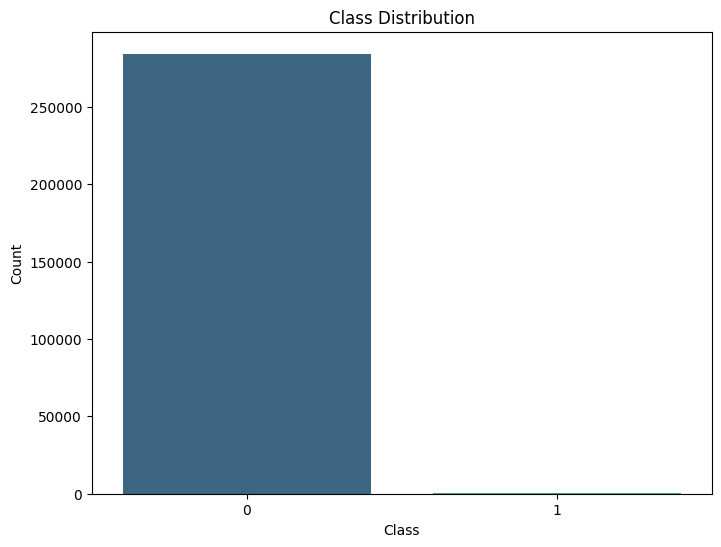

Fraud %: 0.1727%


In [21]:
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print(f'Fraud %: {class_counts[1] / class_counts.sum() * 100:.4f}%')

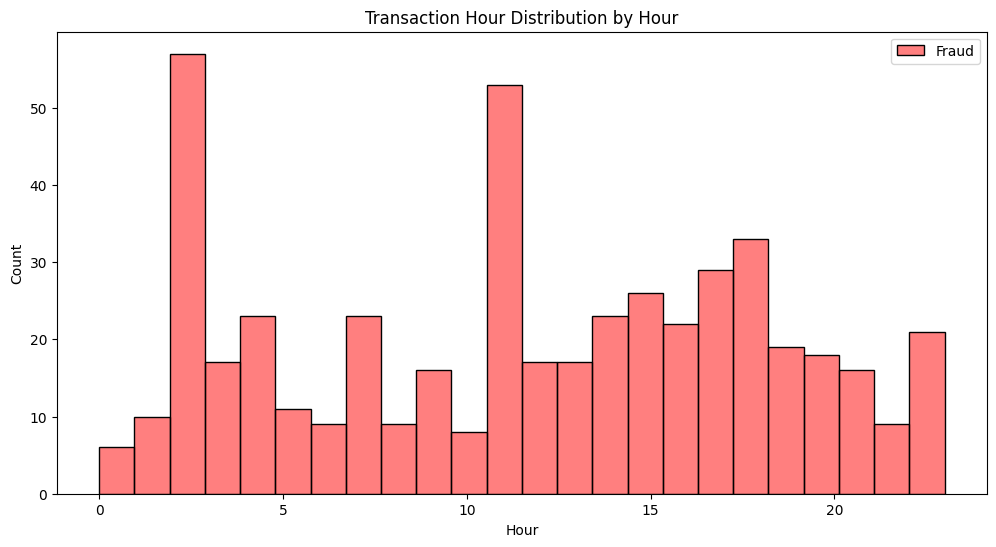

In [29]:
df['Hour'] = df['Time'] // 3600 % 24
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 1], x='Hour', bins=24, label='Fraud', color='red', alpha=.5)
plt.legend()
plt.title('Transaction Hour Distribution by Hour')
plt.show()

C:\Users\alpya\AppData\Local\Temp\ipykernel_3216\3630430613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')


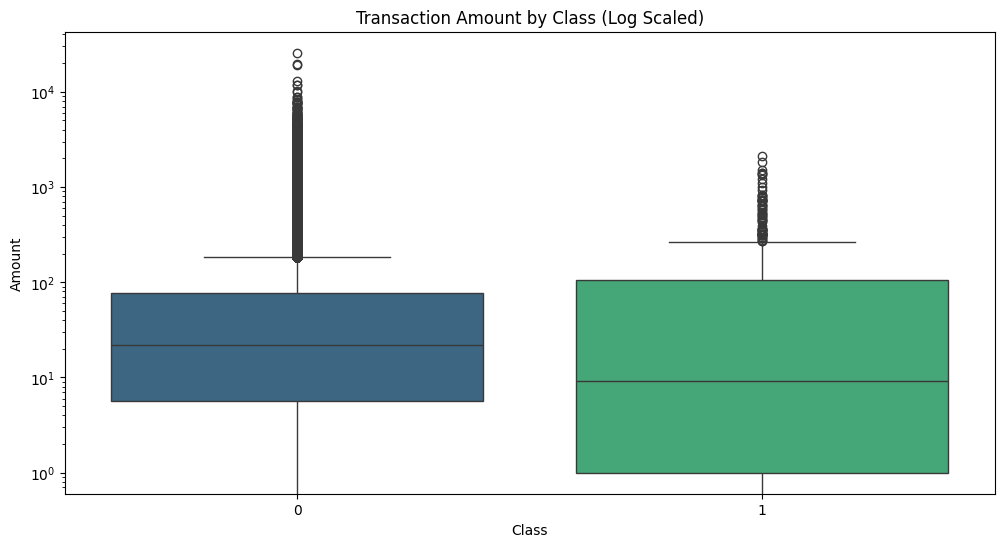

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='viridis')
plt.yscale('log')
plt.title('Transaction Amount by Class (Log Scaled)')
plt.show()

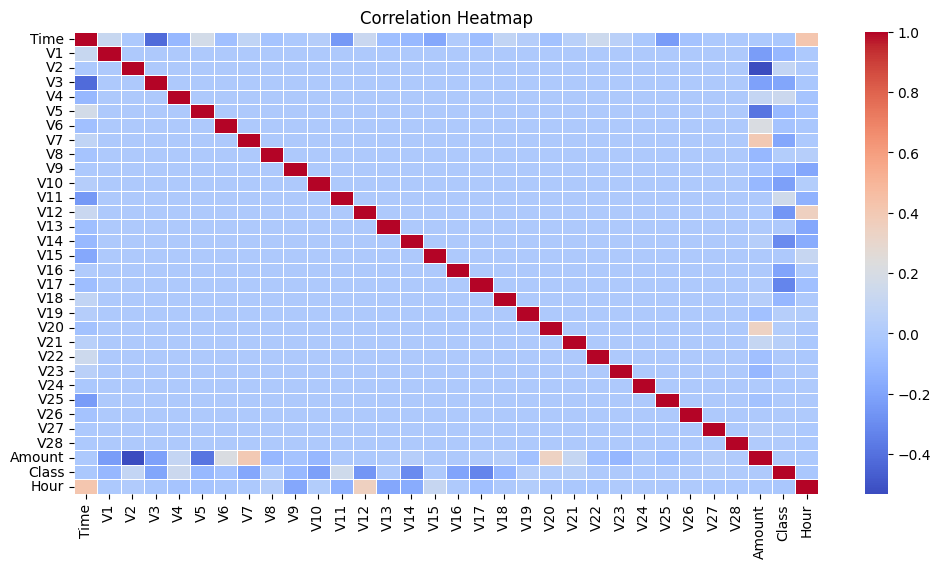

In [31]:
plt.figure(figsize=(12, 6))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
corr_target = corr['Class'].sort_values(ascending=False)
print(corr_target.head(10))
print(corr_target.tail(10))

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


C:\Users\alpya\AppData\Local\Temp\ipykernel_3216\2984868970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_corr.index, y=selected_corr.values, palette='viridis')


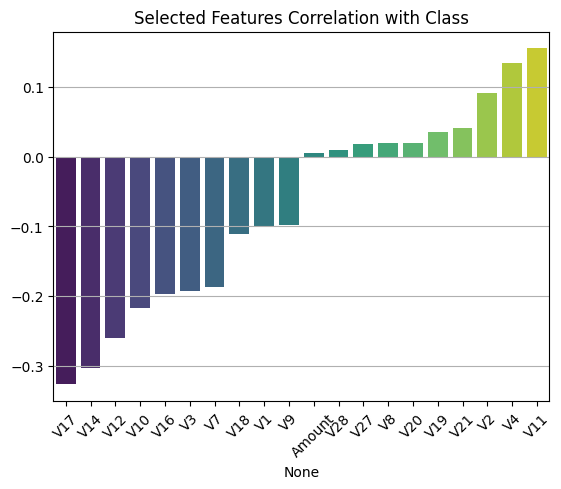

In [38]:
features_to_inspect = corr_target.index[1:11].tolist() + corr_target.index[-10:].tolist()
selected_corr = corr_target[features_to_inspect].sort_values()
sns.barplot(x=selected_corr.index, y=selected_corr.values, palette='viridis')
plt.title('Selected Features Correlation with Class')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

In [39]:
top_corr_features = ['V11', 'V4', 'V2', 'V19', 'V10', 'V17', 'V14', 'V12', 'V16', 'V3']


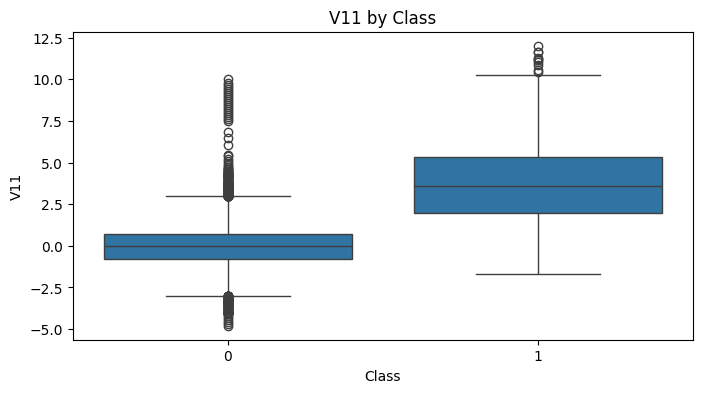

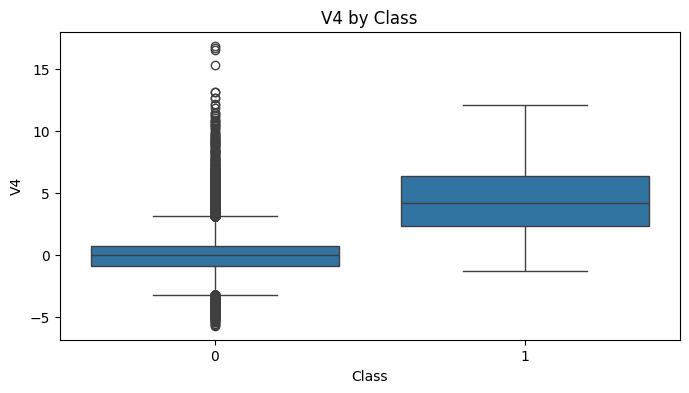

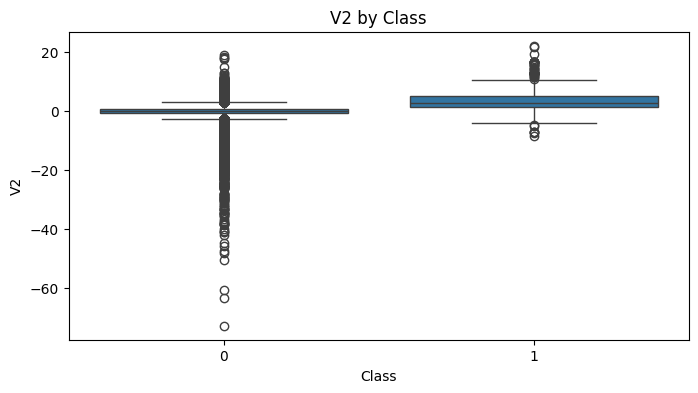

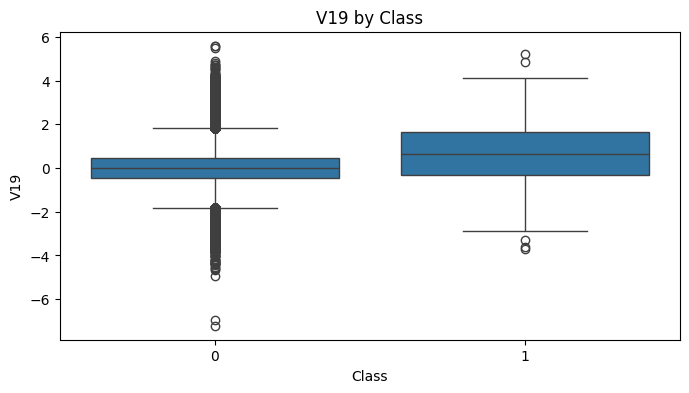

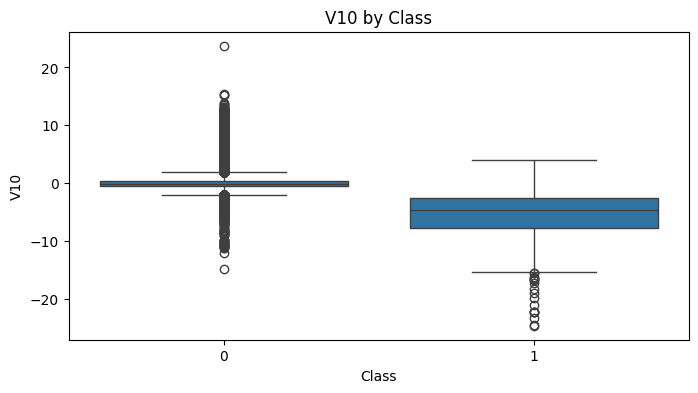

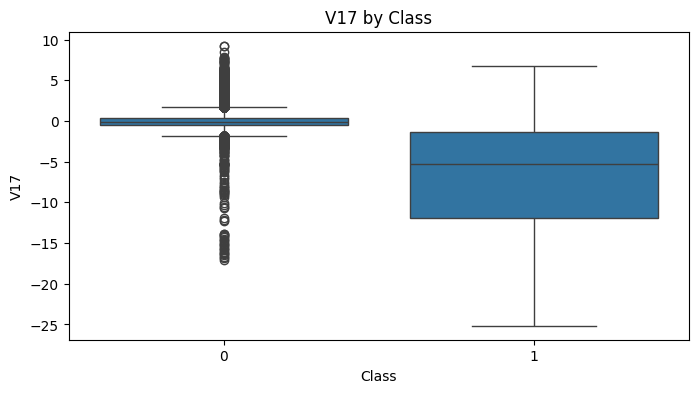

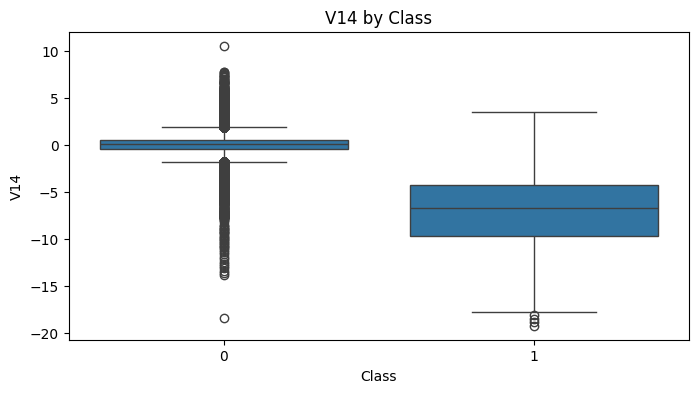

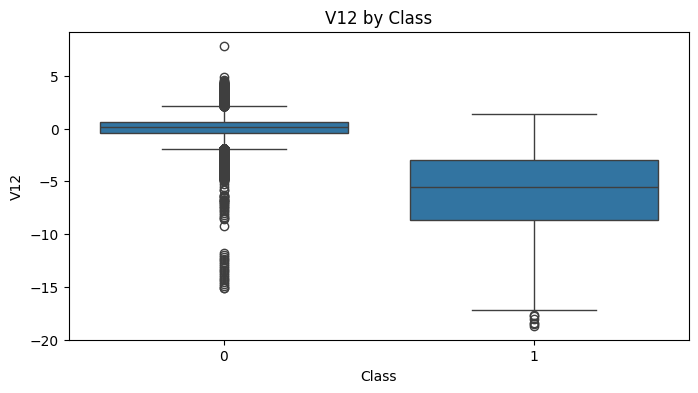

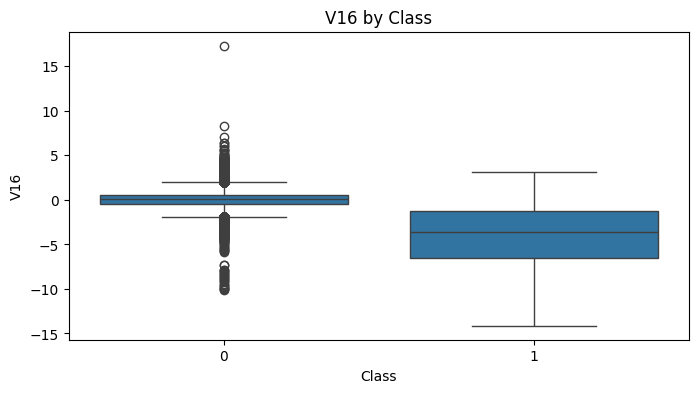

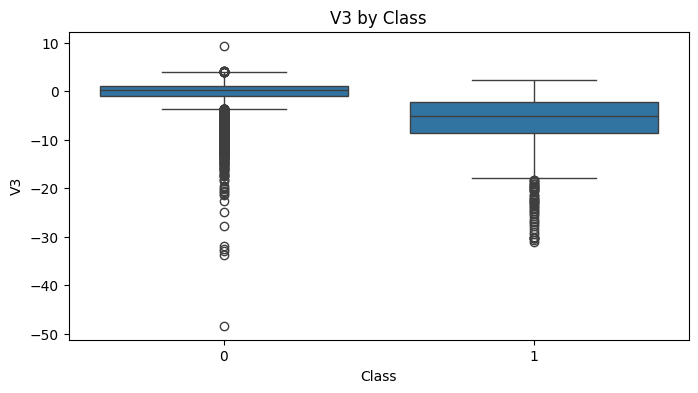

In [40]:
for feature in top_corr_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} by Class')
    plt.show()

In [43]:
def detect_outliers_iqr(data, feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

for feature in top_corr_features:
    outliers = detect_outliers_iqr(df, feature)
    fraud_outliers = outliers[outliers['Class'] == 1]
    print(f'{feature}: {len(fraud_outliers)} frauds among {len(outliers)} outliers and % is {len(fraud_outliers) / len(outliers) * 100:.2f}%')

V11: 294 frauds among 780 outliers and % is 37.69%
V4: 318 frauds among 11148 outliers and % is 2.85%
V2: 246 frauds among 13526 outliers and % is 1.82%
V19: 135 frauds among 10205 outliers and % is 1.32%
V10: 399 frauds among 9496 outliers and % is 4.20%
V17: 397 frauds among 7420 outliers and % is 5.35%
V14: 430 frauds among 14149 outliers and % is 3.04%
V12: 409 frauds among 15348 outliers and % is 2.66%
V16: 351 frauds among 8184 outliers and % is 4.29%
V3: 312 frauds among 3363 outliers and % is 9.28%


In [44]:
def create_outlier_flags(data, feature):
    for feature in top_corr_features:
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[f'{feature}_outlier'] = ((data[feature] < lower_bound) | (data[feature] > upper_bound)).astype(int)
    return data
best_features = ['V11', 'V3', 'V17', 'V10', 'V12']
df = create_outlier_flags(df, best_features)